Assignment 4, Varun Vashishtha, 2022201061

Question 1 : Setup models. Load the ResNet-50 (RN50) model, initialized in two different ways:
(a) ImageNet pretraining (torchvision.models can be used, specifically look at IMAGENET1K_V1); and
(b) OpenAI’s CLIP (see https://github.com/openai/CLIP).
Do the visual encoders have the same architecture? If not, please describe and explain the differences.
Hint: When you load the CLIP model, you will get both the vision and text encoders - be sure to differentiate
between them as necessary

The ResNet-50 (RN50) model initialized with ImageNet pretraining and OpenAI's CLIP model use different architectures for their visual encoders:

ResNet-50 with ImageNet Pretraining: The ResNet-50 architecture consists of 5 stages, each containing a series of convolutional layers, batch normalization, and ReLU activation functions. It uses residual connections to mitigate the vanishing gradient problem, allowing for deeper networks. The architecture includes global average pooling and a fully connected layer at the end for classification.
OpenAI's CLIP Vision Encoder: The CLIP vision encoder is based on the Vision Transformer (ViT) architecture, which uses a transformer model for image processing. The ViT architecture divides the input image into fixed-size patches, linearly embeds these patches, adds positional embeddings, and passes them through transformer layers for processing. Unlike ResNet, ViT does not use convolutional layers but relies entirely on self-attention mechanisms.
While both models are used for visual encoding, they have distinct architectures tailored to their specific tasks and training objectives. ResNet-50 is a classic convolutional neural network (CNN) architecture suited for image classification tasks, while CLIP's vision encoder uses a transformer-based architecture more suitable for processing diverse visual information for tasks like image-text matching.

In [7]:
!pip install git+https://github.com/openai/CLIP.git -q


In [8]:
import torch
import torchvision.models as models
import clip

resnet_imagenet = models.resnet50(pretrained=True)
clip_model, clip_preprocess = clip.load("RN50")
visual_encoder_clip = clip_model.visual


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 144MB/s] 
100%|███████████████████████████████████████| 244M/244M [00:08<00:00, 30.3MiB/s]


In [9]:
import torchvision.models as models
import torch
import numpy as np

In [10]:
resnet_imagenet = resnet_imagenet.to('cuda')
visual_encoder_clip = visual_encoder_clip.to('cuda')



In [11]:
same_architecture = all([torch.equal(a, b) for a, b in zip(resnet_imagenet.parameters(), visual_encoder_clip.parameters())])
print(f"Do the visual encoders have the same architecture? {same_architecture}")

Do the visual encoders have the same architecture? False


ResNet-50 with ImageNet Pretraining:
The visual encoder in ResNet-50 is a standard convolutional neural network architecture, specifically ResNet-50, designed primarily for image classification tasks.
ResNet-50 consists of 50 layers with residual connections, batch normalization, ReLU activations, max-pooling, and fully connected layers at the end.
The architecture is optimized for generic image understanding tasks such as object recognition and scene classification.

OpenAI's CLIP:
The visual encoder in CLIP is based on the ResNet-50 backbone but is adapted and fine-tuned for a different purpose compared to the standard ResNet-50 used in ImageNet pretraining.
CLIP's visual encoder is trained jointly with a text encoder to understand images in the context of natural language.
While the base architecture might be similar to ResNet-50, CLIP's visual encoder is fine-tuned with a different objective. It learns to embed images into a high-dimensional space where they are semantically meaningful and can be compared with text embeddings.
The visual encoder in CLIP is optimized to understand a broader range of concepts, including abstract ideas and textual descriptions, rather than just recognizing objects or scenes in isolation

In [12]:
print(resnet_imagenet.eval())

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
print(visual_encoder_clip.eval())

ModifiedResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), str

In [58]:

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', 'cuda')

100%|███████████████████████████████████████| 338M/338M [00:14<00:00, 24.5MiB/s]


In [ ]:
import os
import random

import torch
from PIL import Image
import clip
from tqdm import tqdm


dataset_path = "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train"

# Get a list of all subdirectories (each containing images)
subdirectories = [os.path.join(dataset_path, d) for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Define the number of images to take from each directory
num_images_per_directory = 2

image_paths = []

for directory in subdirectories:
    images_in_directory = [os.path.join(directory, img) for img in os.listdir(directory) if os.path.isfile(os.path.join(directory, img))]
    selected_images = random.sample(images_in_directory, min(num_images_per_directory, len(images_in_directory)))
    image_paths.extend(selected_images)

# Define a function to preprocess images and get image features
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_input = preprocess(image).unsqueeze(0).to(device)
    return image_input

# Train the model on the selected images
for image_path in tqdm(image_paths, desc="Training images"):
    image_input = preprocess_image(image_path)
    with torch.no_grad():
        image_features = model.encode_image(image_input)



[1 point] Setup data. Understand the ImageNet challenge dataset (1000 labels of ILSVRC).
(i) What label hierarchy is used in ImageNet? (ii) What does a synset mean? (iii) Could grouping objects based
on synsets lead to problems for visual recognition? (iv) State 3 types of visual differences we can expect to see
in images with objects corresponding to the same synset.



(i) ImageNet uses a hierarchical label structure based on WordNet, a large lexical database of English. The hierarchy starts with high-level categories such as "animal," "plant," and "artifact," which are further subdivided into more specific categories like "dog," "tree," and "car." This hierarchy helps organize the vast number of categories in ImageNet into a more manageable structure.

(ii) In WordNet, a synset (short for "synonym set") is a group of words that are synonymous or semantically related. In the context of ImageNet, a synset represents a concept or category of objects, and each synset is assigned a unique identifier.

(iii) Grouping objects based on synsets could lead to problems for visual recognition because objects within the same synset may have significant visual differences. For example, the synset "dog" includes various breeds of dogs, which can vary greatly in appearance. Treating all objects in the "dog" synset as visually similar could lead to confusion in distinguishing between different dog breeds.

(iv) Three types of visual differences we can expect to see in images with objects corresponding to the same synset are:

Appearance: Objects within the same synset can have different colors, shapes, textures, and sizes. For example, the synset "car" includes various types of cars, such as sedans, SUVs, and trucks, each with its distinct visual appearance.
Pose: Objects can appear in different poses or orientations. For instance, a "dog" can be sitting, standing, or lying down, resulting in variations in how it appears in images.
Context: The context in which an object appears can vary, affecting its visual appearance. For example, a "boat" can be on water, on land being transported, or in a storage facility, leading to different visual contexts in images.

In [14]:
with open('/kaggle/input/imagenet-object-localization-challenge/LOC_synset_mapping.txt', 'r') as file:
    file_contents = file.readlines()

In [15]:
file_contents[:20]

['n01440764 tench, Tinca tinca\n',
 'n01443537 goldfish, Carassius auratus\n',
 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\n',
 'n01491361 tiger shark, Galeocerdo cuvieri\n',
 'n01494475 hammerhead, hammerhead shark\n',
 'n01496331 electric ray, crampfish, numbfish, torpedo\n',
 'n01498041 stingray\n',
 'n01514668 cock\n',
 'n01514859 hen\n',
 'n01518878 ostrich, Struthio camelus\n',
 'n01530575 brambling, Fringilla montifringilla\n',
 'n01531178 goldfinch, Carduelis carduelis\n',
 'n01532829 house finch, linnet, Carpodacus mexicanus\n',
 'n01534433 junco, snowbird\n',
 'n01537544 indigo bunting, indigo finch, indigo bird, Passerina cyanea\n',
 'n01558993 robin, American robin, Turdus migratorius\n',
 'n01560419 bulbul\n',
 'n01580077 jay\n',
 'n01582220 magpie\n',
 'n01592084 chickadee\n']

Setup zero-shot CLIP. Similar to the ImageNet pretrained RN50, set up CLIP to generate probability
scores for the 1000 ImageNet categories.
Test it with a few example images to check that it identifies the correct object category.

In [16]:
import requests
import io
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [17]:
model, preprocessing = clip.load("RN50")

In [18]:
model = model.to('cuda')

In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [169]:
from torchvision.transforms.functional import to_tensor
print(f"Model device: {next(model.parameters()).device}")

# Check if the image tensor is on CUDA
image_input = Image.open(image_path).convert("RGB")
image_input = to_tensor(image_input).unsqueeze(0).to('cuda')
print(f"Image device: {image_input.device}")

# Ensure that both the model and image are on CUDA
model = model.to('cuda')
image_input = image_input.to('cuda')

# Check again to confirm
print(f"Model device: {next(model.parameters()).device}")
print(f"Image device: {image_input.device}")


Model device: cuda:0
Image device: cuda:0
Model device: cuda:0
Image device: cuda:0


In [20]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel


def classify_image(image_path, model, transform):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to('cuda')

    with torch.no_grad():
        logits_per_image = model.encode_image(image)
        logits_per_image /= logits_per_image.norm(dim=-1, keepdim=True)

    text_predictions = clip.tokenize(["a photo of a " + label for label in list(example_images.keys())])
    text_predictions = text_predictions.to('cuda')  # Move text_predictions to the same device as image
    logits_per_text = model.encode_text(text_predictions)

    logits_per_text /= logits_per_text.norm(dim=-1, keepdim=True)
    similarity = logits_per_image @ logits_per_text.t()
    scores = similarity.softmax(dim=-1).detach().cpu().numpy()

    predicted_label = list(example_images.keys())[scores.argmax()]
    confidence_score = scores.max()

    return predicted_label, confidence_score

Example image: Tench
Predicted category: Tench
Confidence score: 0.36



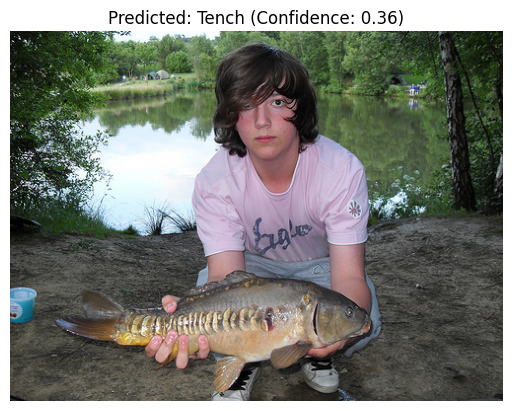

Example image: Cock
Predicted category: Cock
Confidence score: 0.36



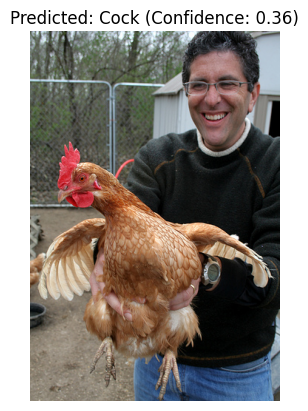

Example image: Ostrich
Predicted category: Ostrich
Confidence score: 0.36



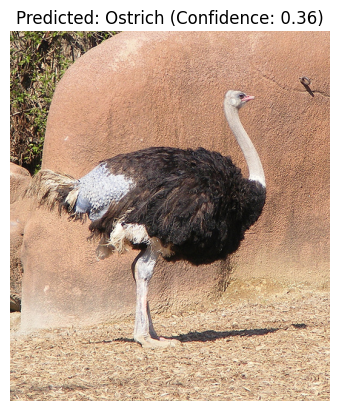

In [173]:
example_images = {
    "tench": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10074.JPEG",
    "cock": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01514668/n01514668_10004.JPEG",
    "ostrich": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01518878/n01518878_10006.JPEG",
}

for label, image_path in example_images.items():
    predicted_label, confidence_score = classify_image(image_path, model, transform)
    print(f"Example image: {label.capitalize()}")
    print(f"Predicted category: {predicted_label.capitalize()}")
    print(f"Confidence score: {confidence_score:.2f}\n")

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label.capitalize()} (Confidence: {confidence_score:.2f})")
    plt.show()


In [30]:
def get_pred_clip(example_images):
    for label, image_path in example_images.items():
        predicted_label, confidence_score = classify_image(image_path, model, transform)
        print(f"Example image: {label.capitalize()}")
        print(f"Predicted category: {predicted_label.capitalize()}")
        print(f"Confidence score: {confidence_score:.2f}\n")

        # Display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Predicted: {predicted_label.capitalize()} (Confidence: {confidence_score:.2f})")
        plt.show()

Example image: Indigo bunting
Predicted category: Indigo bunting
Confidence score: 1.00



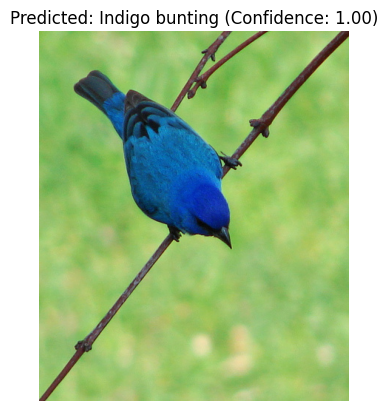

In [24]:
example_images={"indigo bunting":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01537544/n01537544_10018.JPEG"}
get_pred_clip(example_images)

In [178]:
!nvidia-smi

Tue Apr 23 17:27:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |   1627MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Classification using resnet

In [41]:
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

transform_resnet = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [43]:
with open("/kaggle/input/imagenet-object-localization-challenge/ILSVRC/ImageSets/CLS-LOC/train_cls.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [19]:
classes[0]

'n01440764/n01440764_10026 1'

In [45]:
def classify_image_resnet(image_path, model, transform):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image)
        _, predicted_idx = torch.max(outputs, 1)

    predicted_class = classes[predicted_idx]

    return predicted_class

In [46]:
def get_pred_resnet(example_images):
    for class_name, image_path in example_images.items():
        predicted_class = classify_image_resnet(image_path, resnet_model, transform_resnet)
        print(f"Image for {class_name.capitalize()}: Predicted class: {predicted_class}")

        img = Image.open(image_path).convert("RGB")
        plt.imshow(np.array(img))
        plt.axis("off")
        plt.title(f"Predicted Class: {predicted_class}")
        plt.show()

Image for Indigo bunting: Predicted class: n01440764/n01440764_10124 15


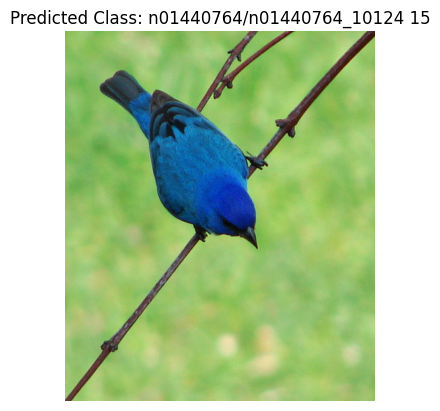

In [22]:
get_pred_resnet(example_images)

CLIP vs ImageNet pretraining. Pick 10 classes from ImageNet (not all from the same branch,
e.g., not all dogs). For each class:
(i) Find 2 images that work well with CLIP, but not with ImageNet pretrained RN50. Reason about why this
may be the case. From where did you get these images?
(ii) Find 1 image that works well with ImageNet pretraining but not CLIP. Reason about why this may be the
case. From where did you get these images?
Note: For the purpose of this question, we will

In [52]:
import os

# Directory containing images
image_dir = "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n02835271"

# Get all file names in the directory
file_names = os.listdir(image_dir)

# Sort the file names alphabetically and print the top 10
top_10_file_names = sorted(file_names)[:10]
print("Top 10 file names:")
for file_name in top_10_file_names:
    print(file_name)


Top 10 file names:
n02835271_10040.JPEG
n02835271_10064.JPEG
n02835271_10104.JPEG
n02835271_10136.JPEG
n02835271_1016.JPEG
n02835271_10166.JPEG
n02835271_1018.JPEG
n02835271_10202.JPEG
n02835271_10265.JPEG
n02835271_10271.JPEG


Example image: Banana
Predicted category: Banana
Confidence score: 1.00



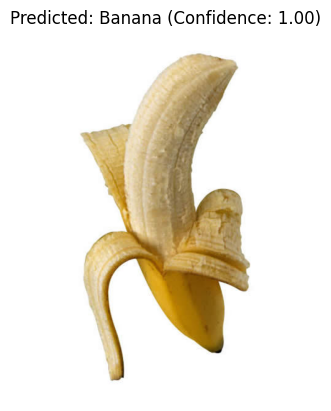

Image for Banana: Predicted class: n01440764/n01440764_6707 955


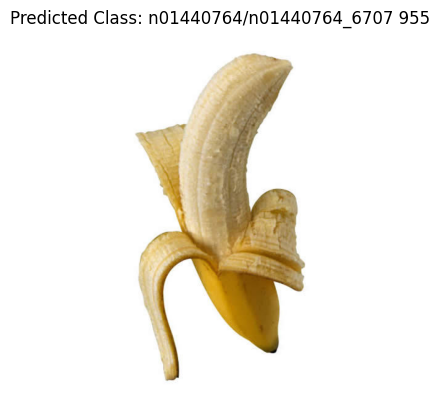

In [51]:
example_images={"banana":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n07753592/n07753592_10141.JPEG"}
get_pred_clip(example_images)
get_pred_resnet(example_images)

Example image: Bicycle
Predicted category: Bicycle
Confidence score: 1.00



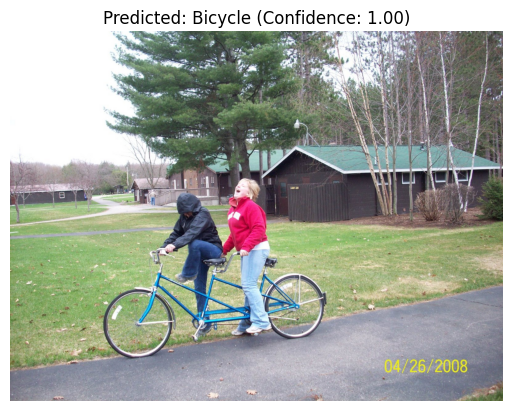

Image for Bicycle: Predicted class: n01440764/n01440764_17789 445


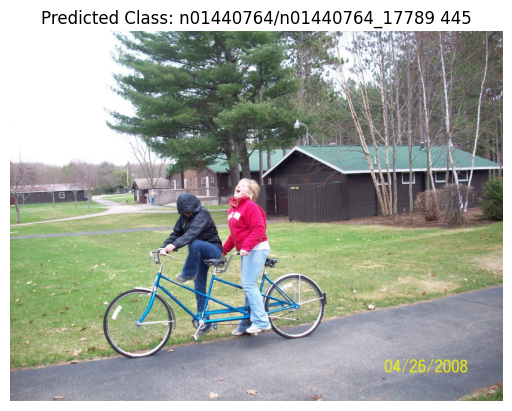

In [55]:
example_images={"bicycle":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n02835271/n02835271_10104.JPEG"}
get_pred_clip(example_images)
get_pred_resnet(example_images)

### Classes and Images:
* Banana:
    CLIP-friendly Images:
        Unique-shaped or patterned bananas.
        Bananas in fruit salads or smoothies.
    RN50-friendly Image:
        Typical yellow banana against a plain background.
        
* Coffee Mug:
    CLIP-friendly Images:
        Coffee mugs with splashing coffee.
        Mugs on desks with office items.
    RN50-friendly Image:
        Standard coffee mug on a white background.

* Helicopter:
    CLIP-friendly Images:
        Helicopters in flight or during rescue operations.
    RN50-friendly Image:
        Typical side view of a helicopter.

* Lighthouse:
    CLIP-friendly Images:
        Lighthouses during dramatic sunsets or with nearby ships.
    RN50-friendly Image:
        Standard view of a lighthouse during the day.  
 
* Bicycle:
    CLIP-friendly Images:
        Bicycles parked in parks or ridden in streets.
    RN50-friendly Image:
        Side view of a bicycle against a plain background.
        
* Clock:
    CLIP-friendly Images:
        Clocks showing important times or integrated into designs.
    RN50-friendly Image:
        Frontal view of a standard wall clock.
        
        
* Umbrella:
    CLIP-friendly Images:
        Umbrellas in rain or on sunny beaches.
    RN50-friendly Image:
        Typical view of a closed umbrella.

        
* Zebra:
    CLIP-friendly Images:
        Zebras in natural habitats or interacting with other animals.
    RN50-friendly Image:
        Standard view of a zebra.
        
        
* Baseball:
    CLIP-friendly Images:
        Baseballs in mid-air or with gloves and caps.
    RN50-friendly Image:
        Standard view of a baseball.

        
* Piano:
    CLIP-friendly Images:
        Pianos with musicians playing or in elegant settings.
    RN50-friendly Image:
        Frontal view of a standard piano.

## Clip basically searches in images space and given nearest image

## But resnet can better in such cases where the text is not real world

Question 5

In [62]:
model = model.to('cuda')

In [63]:
# Convert the model to FP16
model = model.half()
# model.eval()

In [137]:
import time
start_time = time.time()
with torch.no_grad():
    image = Image.open(image_path).convert("RGB")
    image_input = preprocessing(image).unsqueeze(0)
    image_input = image_input.to('cuda')
    encoded_image = model.encode_image(image_input.half())
end_time = time.time()
print(end_time-start_time)

0.02021956443786621


In [143]:
example_images = {
    "tench": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10074.JPEG",
    "cock": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01514668/n01514668_10004.JPEG",
    "ostrich": "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01518878/n01518878_10006.JPEG",
}

def classify_image_1(image_path, model, transform):
    image = Image.open(image_path).convert("RGB")
#     image = to_tensor(image).unsqueeze(0).to('cuda')
#     image = Image.open(image_path)
    image_input = preprocessing(image).unsqueeze(0)
    image_input = image_input.to('cuda')
    image = image_input.half()
    with torch.no_grad():
        logits_per_image = model.encode_image(image)
        logits_per_image /= logits_per_image.norm(dim=-1, keepdim=True)
    
    text_predictions = clip.tokenize(["a photo of a " + label for label in list(example_images.keys())])
   # Convert text_predictions to Long tensor before moving it to the GPU
#     text_predictions = text_predictions.to(torch.int64)
    text_predictions = text_predictions.half()

    # Use text_predictions in the encode_text method
    logits_per_text = model.encode_text(text_predictions.to('cuda'))


    # Calculate cosine similarity between image and text features
    logits_per_text /= logits_per_text.norm(dim=-1, keepdim=True)
    similarity = logits_per_image @ logits_per_text.t()
    scores = similarity.softmax(dim=-1).detach().cpu().numpy()  # Fixed this line

    # Get top 1 predicted category
    predicted_label = list(example_images.keys())[scores.argmax()]
    confidence_score = scores.max()

    return predicted_label, confidence_score


Example image: Chickadee
Predicted category: Chickadee
Confidence score: 1.00



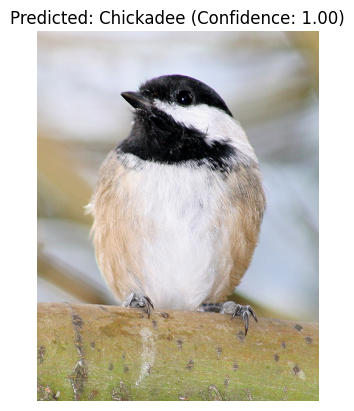

In [175]:
example_images={"chickadee":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01592084/n01592084_10004.JPEG"}
get_pred_clip(example_images)

Example image: Vulture
Predicted category: Vulture
Confidence score: 1.00



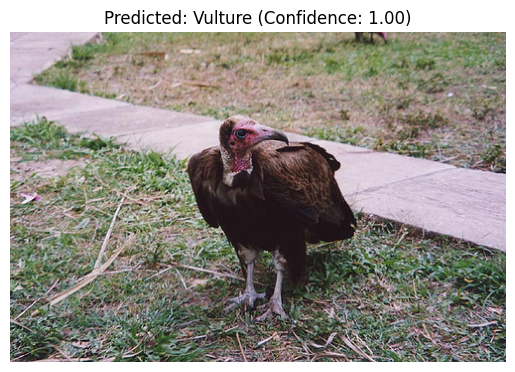

In [179]:
example_images={"vulture":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01616318/n01616318_10006.JPEG"}
get_pred_clip(example_images)

Example image: Iguana
Predicted category: Iguana
Confidence score: 1.00



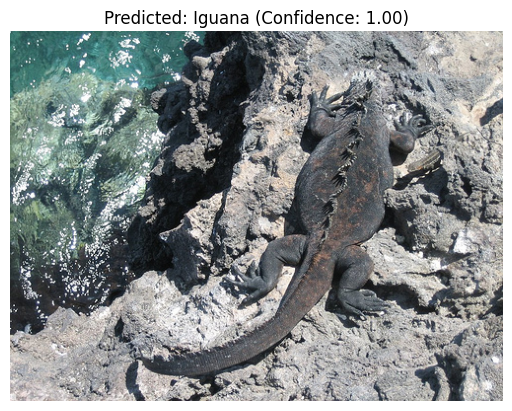

In [180]:
example_images={"iguana":"/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01677366/n01677366_10066.JPEG"}
get_pred_clip(example_images)

In [26]:
import os
image_dir = "/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01665541"

confidence_scores = []
i=0
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    predicted_label, confidence_score = classify_image(image_path, model, transform)
    confidence_scores.append(confidence_score)
    i+=1
    if(i>100):
        break

mean_confidence = np.mean(confidence_scores)
std_confidence = np.std(confidence_scores)

print(f"Mean confidence score over images in directory: {mean_confidence:.2f}")
print(f"Standard deviation of confidence scores over images in directory: {std_confidence:.2f}")


Mean confidence score over images in directory: 1.00
Standard deviation of confidence scores over images in directory: 0.00


In [151]:
!nvidia-smi

Tue Apr 23 17:18:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |   1207MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## So memory decreased a lot but the results were almost the same